In [135]:
import numpy as np
import matplotlib.pyplot as plt

In [136]:
#Definiendo parametros
d = 4*1e-9 #4nm
e_0 = 8.854e-12
e_m = 3*e_0        # Constante dielectrica membrana
e_a = 80*e_0       #Constante dieléctrica agua
sigma =  -0.01     #Carga superficial membrana debida a los fosfolipidos C/m2 0.233-0.01
sigma_libre = 0.004  #Carga superficial añadida por los peptidos LL-37 C/m2 0.191 0.005
lam_debye = 1e-9
N_pep = 2          #Número de peptidos sobre la membrana N=0 y N=1
k = 1.381e-23       #Constante de Boltzmann
T = 298             #Temperatura ambiente
e = 1.602*1e-19       #Carga del electrón
N_A = 6.022e23

In [137]:
c_0 = (e_a * k * T) / (2 * (e)**2 * lam_debye**2)

In [138]:
#Definición de las funciones potencial derivadas para cada región

def Psi_I(A,lam_debye,z):       #Función correspondiente al potencial del plano z=0
 PI= A*np.exp(z/lam_debye)
 return PI

def Psi_II(C,D,z):              #Función correspondiente al potencial en la región 0<z<d
 PII = C*z+D
 return PII

def Psi_III(B,lam_debye,d,z):       #Función correspondiente al potencial del plano z=d
 PIII = B*np.exp(-(z-d)/lam_debye)
 return PIII

In [149]:
#Definición expresiones de las constantes obtenidas analiticamente y la condición del potencial superficial

A= {}
B = {}
C = {}
D = {}

porcentajes = np.linspace(0.0,1.0,11)       #Definiendo los porcentajes desde 10% hasta sigma_libre_max

for m, per in enumerate(porcentajes):
    sigma_libre_t = sigma_libre*per   #Tomando un porcentaje de la densidad de carga
    print(sigma_libre_t)

    a = (2 * k*T / e) * np.arcsinh(sigma / np.sqrt(8 * e_a * k*T * c_0))
    A[m] = a
    D[m] = a                                    #D = A

    c = (lam_debye / d) * (sigma_libre_t / e_a + 2 * sigma / e_a - 2 * A[m] / lam_debye)
    C[m] = c

    b = C[m]*d + A[m]
    B[m] = b 

A,B

0.0
0.0004
0.0008
0.0012000000000000001
0.0016
0.002
0.0024000000000000002
0.0028000000000000004
0.0032
0.0036000000000000003
0.004


({0: -0.01394602502707978,
  1: -0.01394602502707978,
  2: -0.01394602502707978,
  3: -0.01394602502707978,
  4: -0.01394602502707978,
  5: -0.01394602502707978,
  6: -0.01394602502707978,
  7: -0.01394602502707978,
  8: -0.01394602502707978,
  9: -0.01394602502707978,
  10: -0.01394602502707978},
 {0: -0.014289800588461224,
  1: -0.013725084076150402,
  2: -0.013160367563839585,
  3: -0.012595651051528763,
  4: -0.012030934539217945,
  5: -0.011466218026907124,
  6: -0.010901501514596302,
  7: -0.010336785002285485,
  8: -0.009772068489974663,
  9: -0.009207351977663841,
  10: -0.008642635465353023})

In [140]:
#Definiendo los valores de z en cada región

n_points = 300
z_max = 5*lam_debye  

z_0  = np.linspace(-z_max, 0, n_points)
z_mem   = np.linspace(0, d, n_points)
z_d = np.linspace(d, d+z_max, n_points)

# Unirlas en un solo vector continuo:
z = np.concatenate([z_0, z_mem, z_d])

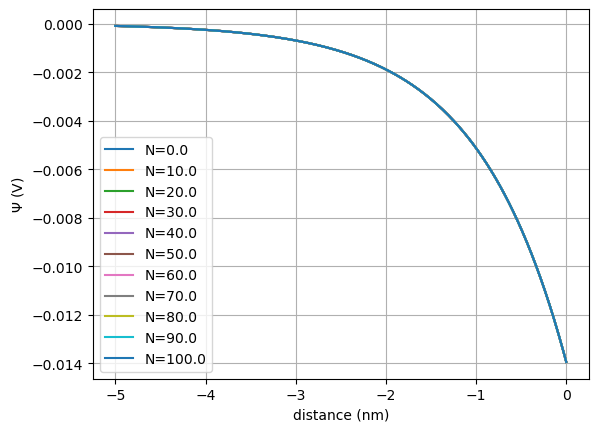

In [141]:
#Gráfica región z=<0

for m in A:
    psi_I = Psi_I(A[m],lam_debye,z_0)
    plt.plot(z_0*1e9,psi_I, label= "N=" + str(round(porcentajes[m]*100,1)))

plt.legend()
plt.xlabel("distance (nm)")
plt.ylabel(r"$\Psi$ (V)")
plt.grid()
plt.show()

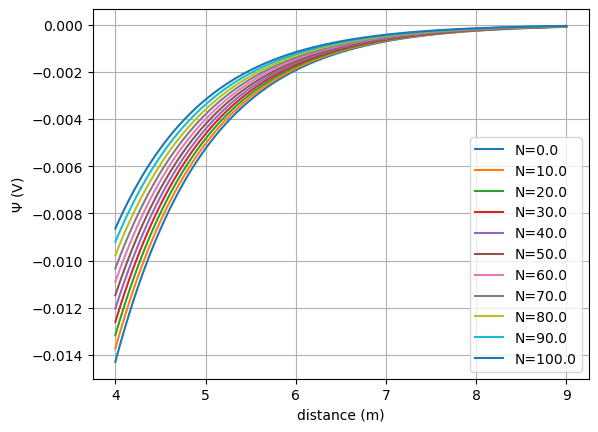

In [142]:
#Gráfica región z=>0
for m in B:
    psi_III = Psi_III(B[m],lam_debye,d,z_d)
    plt.plot(z_d*1e9,psi_III, label= "N=" + str(round(porcentajes[m]*100,1)))

plt.legend()
plt.xlabel("distance (m)")
plt.ylabel(r"$\Psi$ (V)")
plt.grid()
plt.show()

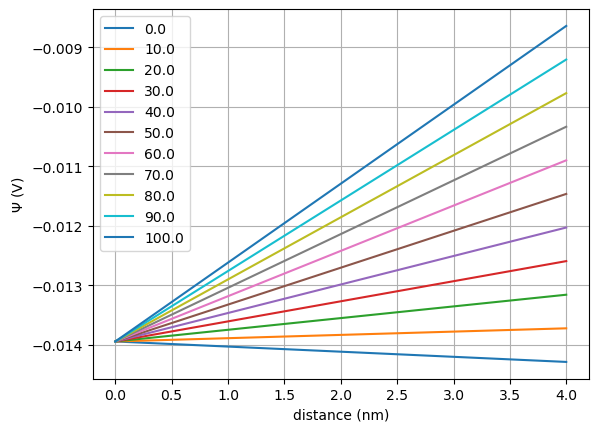

In [143]:
for m in A:
    psi_II = Psi_II(C[m],D[m],z_mem)
    plt.plot(z_mem*1e9,psi_II, label=str(round(porcentajes[m]*100,1)))
plt.legend()
plt.xlabel("distance (nm)")
plt.ylabel(r"$\Psi$ (V)")
plt.grid()
plt.show()

In [156]:
np.linspace(0.0,1.0,11)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

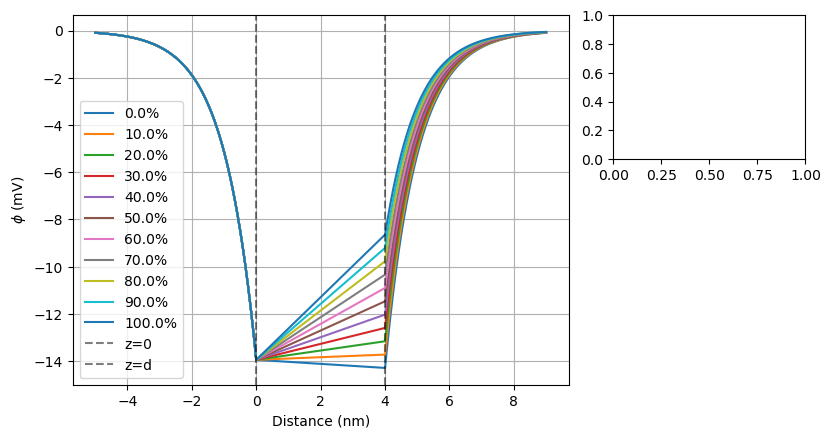

In [191]:
for m in A:
    psi_I = Psi_I(A[m], lam_debye, z_0)
    psi_II = Psi_II(C[m], D[m], z_mem)
    psi_III = Psi_III(B[m], lam_debye, d, z_d)
    
    # Unir todas las regiones
    psi_total = np.concatenate([psi_I, psi_II, psi_III])
    
    plt.plot(z*1e9, psi_total*1e3, label=str(round(porcentajes[m]*100,1))+"%")  # Convertir a nm para mejor visualización
    

plt.axvline(x=0, color='k', linestyle='--', alpha=0.5, label='z=0')
plt.axvline(x=d*1e9, color='k', linestyle='--', alpha=0.5, label='z=d')
plt.xlabel("Distance (nm)")
plt.ylabel(r"$\phi$ (mV)")
plt.legend()
#plt.ylim(-16, -6)
#plt.xlim(-0.2, 5)
plt.grid(True)

plt.axes([0.97, 0.58, 0.3, 0.3]) 

plt.show()

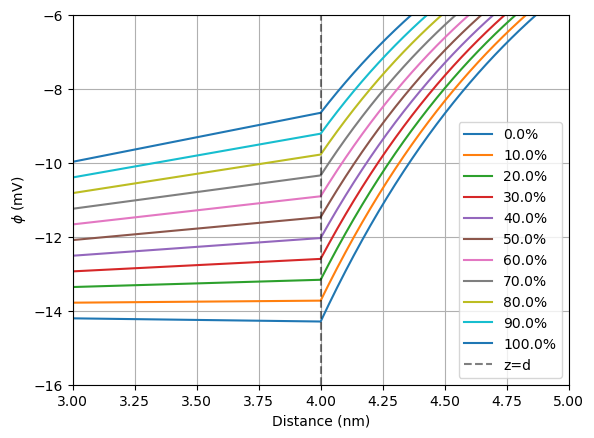

In [172]:
for m in A:
    psi_I = Psi_I(A[m], lam_debye, z_0)
    psi_II = Psi_II(C[m], D[m], z_mem)
    psi_III = Psi_III(B[m], lam_debye, d, z_d)
    
    # Unir todas las regiones
    psi_total = np.concatenate([psi_I, psi_II, psi_III])
    
    plt.plot(z*1e9, psi_total*1e3, label=str(round(porcentajes[m]*100,1))+"%")  # Convertir a nm para mejor visualización

#plt.axvline(x=0, color='k', linestyle='--', alpha=0.5, label='z=0')
plt.axvline(x=d*1e9, color='k', linestyle='--', alpha=0.5, label='z=d')
plt.xlabel("Distance (nm)")
plt.ylabel(r"$\phi$ (mV)")
plt.legend()
plt.ylim(-16, -6)
plt.xlim(3.0, 5.0)
plt.grid(True)
plt.show()

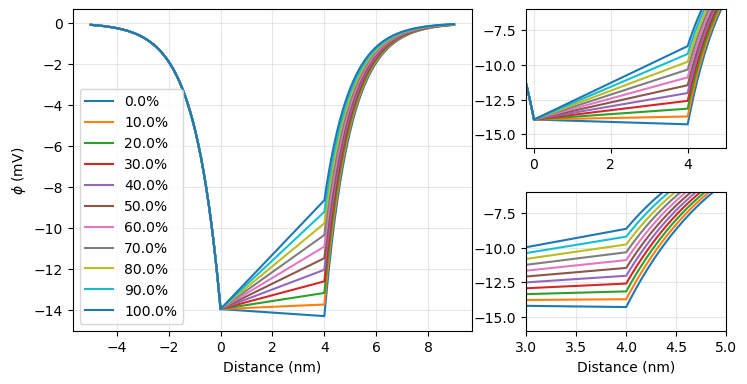

In [264]:


fig = plt.figure(figsize=(10, 4))
gs = plt.GridSpec(2, 3, width_ratios=[2, 1, 1])  # 2 filas, 3 columnas

    # Gráfica principal (ocupa las 2 filas de la primera columna)
ax_main = fig.add_subplot(gs[:, 0])  # Todas las filas, columna 0

    # Subplots pequeños (2 filas × 2 columnas del lado derecho)
ax1 = fig.add_subplot(gs[0, 1])  # Fila 0, columna 1
    #ax2 = fig.add_subplot(gs[0, 2])  # Fila 0, columna 2  
ax3 = fig.add_subplot(gs[1, 1])  # Fila 1, columna 1
    #ax4 = fig.add_subplot(gs[1, 2])  # Fila 1, columna 2

for m in A:
    psi_I = Psi_I(A[m], lam_debye, z_0)
    psi_II = Psi_II(C[m], D[m], z_mem)
    psi_III = Psi_III(B[m], lam_debye, d, z_d)
    
    # Unir todas las regiones
    psi_total = np.concatenate([psi_I, psi_II, psi_III])

    # Crear la estructura con gridspec


    # Datos de ejemplo
    x = np.linspace(0, 10, 100)

    # Gráfica principal
    ax_main.plot(z*1e9, psi_total*1e3, label=str(round(porcentajes[m]*100,0))+"%")
    ax1.plot(z*1e9, psi_total*1e3)
    ax3.plot(z*1e9, psi_total*1e3)


ax_main.grid(True, alpha=0.3)
ax_main.set_ylabel(r"$\phi$ (mV)")
ax_main.set_xlabel("Distance (nm)")
ax_main.legend()

    # Subplots pequeños
ax1.set_ylim(-16, -6)
ax1.set_xlim(-0.2, 5.0)
ax1.grid(True, alpha=0.3)


ax3.set_ylim(-16, -6)
ax3.set_xlim(3.0, 5)
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.xlabel("Distance (nm)")
plt.show()

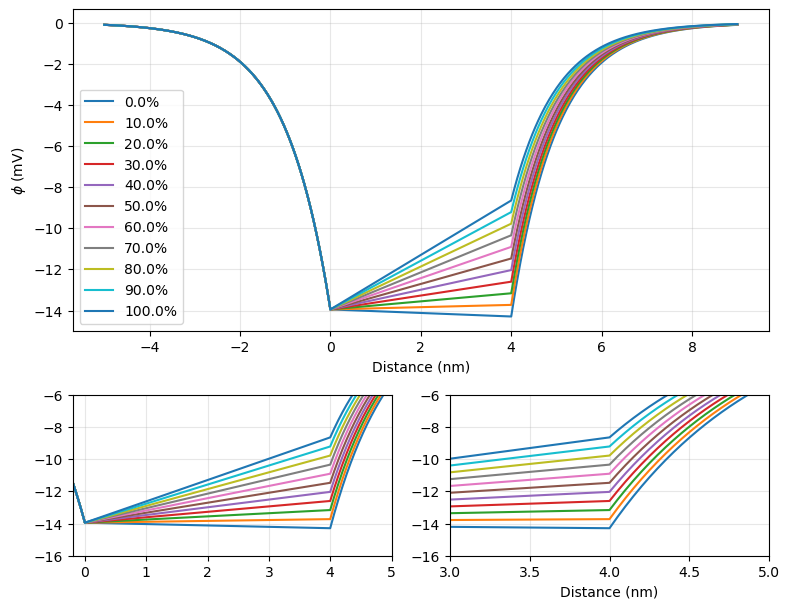

In [263]:
fig = plt.figure(figsize=(8, 6))
gs = plt.GridSpec(2, 2, height_ratios=[2, 1])  # 2 filas, 3 columnas

    # Gráfica principal (ocupa las 2 filas de la primera columna)
ax_main = fig.add_subplot(gs[0, :])  # Todas las filas, columna 0

    # Subplots pequeños (2 filas × 2 columnas del lado derecho)
ax1 = fig.add_subplot(gs[1, 0])  # Fila 0, columna 1
    #ax2 = fig.add_subplot(gs[0, 2])  # Fila 0, columna 2  
ax3 = fig.add_subplot(gs[1, 1])  # Fila 1, columna 1
    #ax4 = fig.add_subplot(gs[1, 2])  # Fila 1, columna 2

for m in A:
    psi_I = Psi_I(A[m], lam_debye, z_0)
    psi_II = Psi_II(C[m], D[m], z_mem)
    psi_III = Psi_III(B[m], lam_debye, d, z_d)
    
    # Unir todas las regiones
    psi_total = np.concatenate([psi_I, psi_II, psi_III])


    # Gráfica principal
    ax_main.plot(z*1e9, psi_total*1e3, label=str(round(porcentajes[m]*100,1))+"%")
    ax1.plot(z*1e9, psi_total*1e3)
    ax3.plot(z*1e9, psi_total*1e3)

ax_main.grid(True, alpha=0.3)
ax_main.set_ylabel(r"$\phi$ (mV)")
ax_main.set_xlabel("Distance (nm)")
ax_main.legend()

    # Subplots pequeños
ax1.set_ylim(-16, -6)
ax1.set_xlim(-0.2, 5.0)
ax1.grid(True, alpha=0.3)


ax3.set_ylim(-16, -6)
ax3.set_xlim(3.0, 5)
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.xlabel("Distance (nm)")
plt.show()